In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Aquisição de dados
df = pd.read_csv('https://raw.githubusercontent.com/JohnEric-Creator/FreeDataScienceAcquisition/refs/heads/main/Titanic-Dataset.csv')

In [65]:
# Data cleaning de NaN
# Ajustando valores NaN da coluna Age com fillna
# df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Data cleaning de NaN
# Dropar as linhas (registros) que tem NaN nas colunas Fare ou Embarked
df = df.dropna(subset=['Fare', 'Embarked'])

# Engenharia de atributos (features engineering)
# Características derivadas
df['Family'] = df['SibSp'] + df['Parch'] + 1

# Engenharia de atributos (features engineering)
# Criação de variáveis dummies (one-hot enconding) da coluna Sex
df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 0})

# Engenharia de atributos (features engineering)
# Criação de variáveis dummies (one-hot enconding) da coluna Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True, dtype=int)
# df['Embarked_Q'] = df['Embarked_Q'].map({True : 1, False : 0})
# df['Embarked_S'] = df['Embarked_S'].map({True : 1, False : 0})

# Engenharia de atributos (features engineering)
# Discretização de variáveis contínuas (bins / intervalos) da coluna Age
bins = [0, 12, 18, 50, 100]
labels = ['Criança', 'Adolescente', 'Adulto', 'Idoso']
df['faixaEtaria'] = pd.cut(x=df['Age'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['faixaEtaria'], drop_first=True, dtype=int)

# Engenharia de atributos (features engineering)
# Discretização de variáveis contínuas (bins / intervalos) da coluna Fare
bins = [0, 7.91, 14.54, 31, 512]
labels= ['Low', 'Mid-low', 'Mid-high', 'High']
df['faixaTarifas'] = pd.cut(x=df['Fare'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['faixaTarifas'], drop_first=True, dtype=int)

# Separar em conjuntos de entrada e saída (target ou alvo)
# Separar em varíaveis independentes (X) e dependentes (y ou target ou alvo)
X = df[['Sex', 'Family', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3',
        'faixaEtaria_Adolescente', 'faixaEtaria_Adulto', 'faixaEtaria_Idoso',
        'faixaTarifas_Mid-low', 'faixaTarifas_Mid-high', 'faixaTarifas_High']]
y = df['Survived']

# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [66]:
# Função da Regressão Logística
def regressao(X_train, y_train, X_test):
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred

In [67]:
# Função do KNN
def knn(X_train, y_train, X_test, k):
  model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # n_neighbors == k
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred

In [68]:
# Função Árvore de Decisão
def arvore(X_train, y_train, X_test, k):
  model = DecisionTreeClassifier(max_depth=k, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred

In [69]:
# Função Random Forest
def randomforest(X_train, y_train, X_test, n, k):
  model = RandomForestClassifier(n_estimators=n, max_depth=k, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred

In [70]:
# Métricas de avaliação dos modelos
y_regressao = regressao(X_train, y_train, X_test)
acuracia_regressao = accuracy_score(y_test, y_regressao)

y_knn = knn(X_train, y_train, X_test, 20)
acuracia_knn = accuracy_score(y_test, y_knn)

y_arvore = arvore(X_train, y_train, X_test, 3)
acuracia_arvore =  accuracy_score(y_test, y_arvore)

y_forest = randomforest(X_train, y_train, X_test, 100, 4)
acuracia_forest = accuracy_score(y_test, y_forest)

print(f'Acurácia Regressão: {acuracia_regressao}')
print(f'Acurácia KNN      : {acuracia_knn}')
print(f'Acurácia Árvore   : {acuracia_arvore}')
print(f'Acurácia Forest   : {acuracia_forest}')

Acurácia Regressão: 0.8089887640449438
Acurácia KNN      : 0.797752808988764
Acurácia Árvore   : 0.8314606741573034
Acurácia Forest   : 0.8651685393258427


In [71]:
# Verificando o impacto da max_depth (k)
for k in range(1, 11):
  y_arvore = arvore(X_train, y_train, X_test, k)
  acuracia_arvore =  accuracy_score(y_test, y_arvore)
  print(f'Acurácia Árvore (max_depth = {k})  : {acuracia_arvore}')
  # print(classification_report(y_test, y_arvore))
  # print(confusion_matrix(y_test, y_arvore))
  # ConfusionMatrixDisplay(confusion_matrix(y_test, y_arvore)).plot()
  # plt.show()
  # sns.heatmap(confusion_matrix(y_test, y_arvore), annot=True, fmt='d')
  # plt.show()

Acurácia Árvore (max_depth = 1)  : 0.8314606741573034
Acurácia Árvore (max_depth = 2)  : 0.8202247191011236
Acurácia Árvore (max_depth = 3)  : 0.8314606741573034
Acurácia Árvore (max_depth = 4)  : 0.8539325842696629
Acurácia Árvore (max_depth = 5)  : 0.8426966292134831
Acurácia Árvore (max_depth = 6)  : 0.8089887640449438
Acurácia Árvore (max_depth = 7)  : 0.8202247191011236
Acurácia Árvore (max_depth = 8)  : 0.8202247191011236
Acurácia Árvore (max_depth = 9)  : 0.7752808988764045
Acurácia Árvore (max_depth = 10)  : 0.7752808988764045


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        58
           1       0.68      0.68      0.68        31

    accuracy                           0.78        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.78      0.78      0.78        89

[[48 10]
 [10 21]]


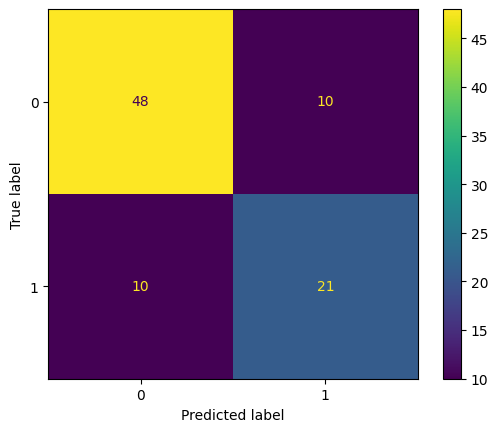

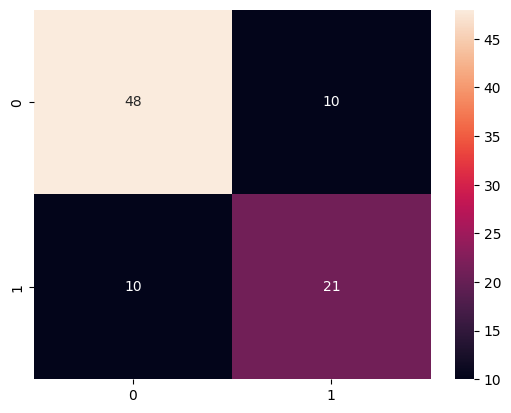

In [72]:
print(classification_report(y_test, y_arvore))
print(confusion_matrix(y_test, y_arvore))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_arvore)).plot()
plt.show()
sns.heatmap(confusion_matrix(y_test, y_arvore), annot=True, fmt='d')
plt.show()


In [73]:
# Verificando o impacto do max_depth e do n_estimators no Random Forest
list_n_estimators = [50, 100, 150]
list_max_depth = [2, 3, 4, 5, 6]
for x in list_n_estimators:
  for y in list_max_depth:
    y_forest = randomforest(X_train, y_train, X_test, x, y)
    acuracia_forest = accuracy_score(y_test, y_forest)
    print(f'Acurácia Forest (n={x}) (depth={y})  : {acuracia_forest}')


Acurácia Forest (n=50) (depth=2)  : 0.8202247191011236
Acurácia Forest (n=50) (depth=3)  : 0.8651685393258427
Acurácia Forest (n=50) (depth=4)  : 0.8651685393258427
Acurácia Forest (n=50) (depth=5)  : 0.8651685393258427
Acurácia Forest (n=50) (depth=6)  : 0.8426966292134831
Acurácia Forest (n=100) (depth=2)  : 0.8314606741573034
Acurácia Forest (n=100) (depth=3)  : 0.8314606741573034
Acurácia Forest (n=100) (depth=4)  : 0.8651685393258427
Acurácia Forest (n=100) (depth=5)  : 0.8539325842696629
Acurácia Forest (n=100) (depth=6)  : 0.8539325842696629
Acurácia Forest (n=150) (depth=2)  : 0.8202247191011236
Acurácia Forest (n=150) (depth=3)  : 0.8651685393258427
Acurácia Forest (n=150) (depth=4)  : 0.8651685393258427
Acurácia Forest (n=150) (depth=5)  : 0.8539325842696629
Acurácia Forest (n=150) (depth=6)  : 0.8539325842696629
